<a href="https://colab.research.google.com/github/swapnalishamrao/Unsupervised_ML_Clustering_Project/blob/main/Netflix_Movies_and_Tv_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size='8px'><font color='blue'>**<u>Netflix Movies and Tv Shows Clustering<u>**  

#### **Project Type**  - Unsupervised ML
#### **Contribution**  - Individual
#### **Name**          - Swapnali Shamrao Mane

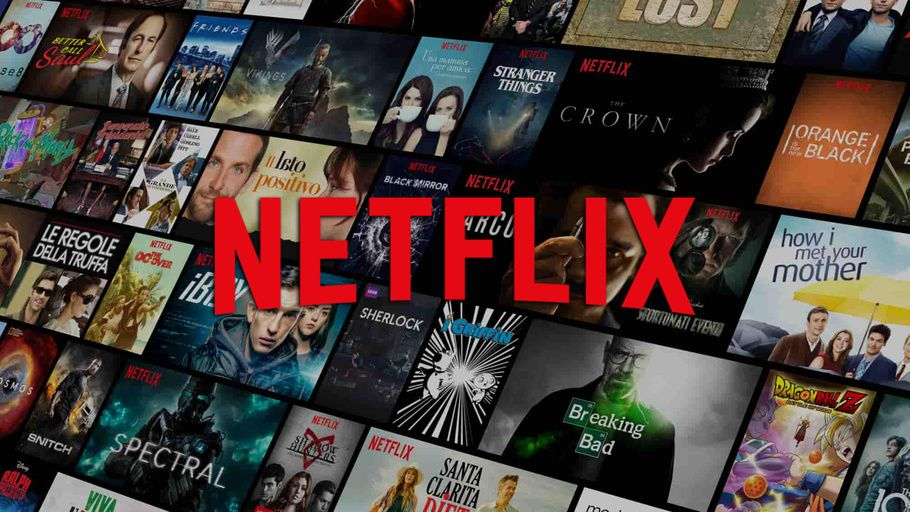

### <font size='5px'><font color='#grey'>**<u>Project Summary:-<u>**

**1.Project Objective**: The project aimed to group similar movies and TV shows on Netflix into clusters based on their content.

**2.Data Source**: Data was collected from a third-party Netflix search engine, providing details on over 7,000 Netflix titles.

**3.Data Description**: The dataset included information such as title, director, cast, country, date added, rating, and release year. Some data fields had missing values, which were addressed.

**4.Data Preprocessing**: Missing values were filled with placeholders like "Unavailable." The "date_added" feature was converted to datetime, and additional date-related features were created. Outliers in the "release year" were handled using the interquartile range.

**5.Data Analysis and Insights**:

* Netflix had more movies (69.14%) than TV shows (30.86%).
* Majority of movies were released between 2015 and 2020, while TV shows peaked between 2018 and 2020.
* 2017 was a significant year for movie releases, and 2020 for TV shows.
* Netflix shifted focus to releasing more TV shows than movies in 2020.
* Peak content additions occurred in 2019, with regular additions throughout the year.
* Most common content rating was TV-MA, followed by TV-14.
* The United States produced most movies on Netflix, with India in second place.
* The United States and the United Kingdom dominated TV show production.
* Raul Campos and Jan Suter directed many Netflix movies, while Alastair Fothergill was prominent in TV shows.
* International movies and dramas were popular content on Netflix.
* Common actors in Netflix content included Lee, Michel, David, Jhon, and James.
* Some correlations were observed between release year and day added, indicating Netflix's growth.

**6.Text Data Processing**: Text data from the description was cleaned by removing punctuation, stopwords, and digits. It was then converted into a TF-IDF matrix for clustering.

**7.Clustering Models**:

* Various clustering algorithms, including K-Means, Hierarchical, and DBSCAN, were applied.
* Out of all the methods we tried, the K-Means clustering model was the best at this job. It had a high score, which means it did a good job at putting similar things together.
* K-Means clustering performed the best with high Calinski-Harabasz and silhouette scores.

**8.Challenges Faced**:

Identifying the optimal number of clusters was challenging.
Methods like the Kelbow method and silhouette score took time to provide results.

**9.Project Outcome**: The project successfully organized Netflix movies and TV shows into clusters, making it easier for users to find content that suits their preferences.

**10.Conclusion**: Despite challenges, the project achieved its goal of clustering Netflix content effectively, enhancing the user experience on the platform.

### <font size='5px'><font color='grey'>**GitHub Link:-**

https://github.com/swapnalishamrao/Unsupervised_ML_Clustering_Project

## <font size='5px'><font color='deeppink'>**Problem Statement**

"We need to understand what types of TV shows and movies are available on Netflix and if there has been a shift towards more TV shows than movies in recent years. We also want to group similar content together for better user recommendations."

# <font size='5px'><font color='cgrey'>***Let's Begin !***

 <font size='5px'><font color='green'>**Importing Library and connecting drive**

In [1]:
# Import Libraries
# Important modules
import pandas as pd
import numpy as np

#visulizaiton modules
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm
import geopandas as gpd
!pip install country_converter --upgrade
import country_converter as coco
import plotly.express as px

#import string module
import string
string.punctuation

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import ttest_ind
from scipy import stats

#nlp module
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.metrics.pairwise import cosine_similarity

#import fundamental models
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer

#import warnings
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 963.2 kB/s eta 0:00:00


### <font size='5px'><font color='purple'>**Dataset Loading**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df=pd.read_csv(r"/content/drive/MyDrive/Unsupervised_ML_Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv")

###<font size='5px'><font color='blue'>**Dataset First View**

In [4]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


###  <font size='5px'><font color='baby'>**<u>Data Inispection</u>**

In [8]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

Dataset having 7787 observations and 12 columns.

### <font size='5px'><font color='winered'>**Dataset Information**

In [7]:
#Information of dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


1.In the dataset, there are object,  and int64 dtypes features present.

2.Dataset is having numerical and categorical data.

3.Mixed data(Numerical+Categorical)

4.There are 12 features

#### <font size='5px'><font color='#cwinered'>**Checking Duplicate Values**

In [9]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


We found that there were no duplicate entries in the above data.

#### <font size='5px'><font color='fkep'>**Checking Missing Values/Null Values**

In [10]:
# Checking for number of null values
count_null_df=df.isnull().sum()
count_null_df

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
# Missing Values Percentage
percentage_null_value = round(df.isna().sum()/len(df)*100, 2)

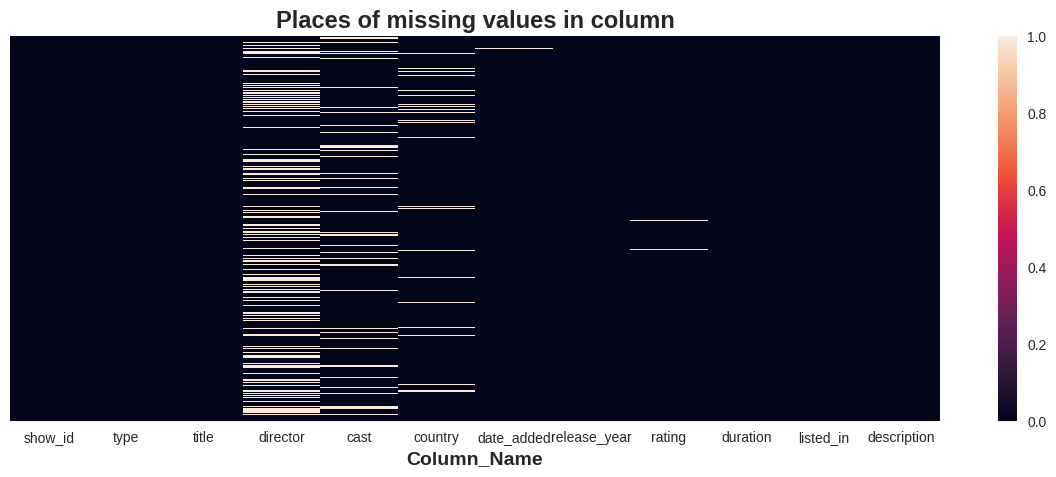

In [12]:
# No missing Values in our dataset
plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

<Axes: >

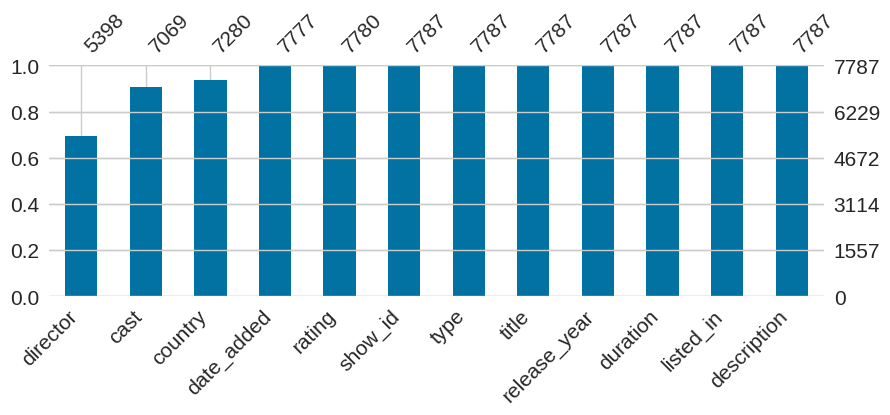

In [13]:
# Visualizing the missing values
import missingno as msno
msno.bar(df, color='b',sort='ascending', figsize=(10,3), fontsize=15)